# Figures

## Check jupyter kernel

In [1]:
import sys
sys.executable

'/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Isabel_fMRITemporalComplexity/QuartoManuscript/.venv/bin/python'

## Libraries

In [2]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import math
import ast # read file

from fbm import FBM #fractional signals
import matplotlib.pyplot as plt #plotting
import matplotlib.lines as lines #draw lines
from matplotlib.patches import Polygon
from sklearn.linear_model import LinearRegression #perform linear regression
from scipy import signal #create signals
import string #for latex
import warnings
warnings.filterwarnings("ignore")

## Wordcloud

### Shape

In [3]:
brain_mask = np.array(Image.open('datafiles/brain.png'))
brain_mask[brain_mask != 0] = 255
brain_mask = 255 - brain_mask

### Wordcloud proper

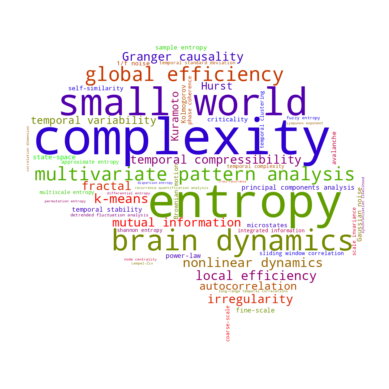

In [4]:
with open("datafiles/pubmedsearchresults.txt", "r") as f:
    filtered_counts = ast.literal_eval(f.read())
    
# log to account for big differences
log_freq = {key: round(10*math.log(value)) for key, value in filtered_counts.items()}

    
#wc = WordCloud(background_color= '#FFFFFF', contour_color= '#FFFFFF', mask = brain_mask, width = 800, height = 500, random_state=123).generate_from_frequencies(filtered_counts)
wc = WordCloud(colormap = 'brg_r', prefer_horizontal=0.7, background_color= '#FFFFFF', contour_color= '#FFFFFF', mask = brain_mask, width = 800, height = 500, random_state=3).generate_from_frequencies(log_freq)
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.savefig('../images/wordcloud_pubmed.png', bbox_inches='tight', dpi=300)
#plt.show()


## Sierpinski Triangle

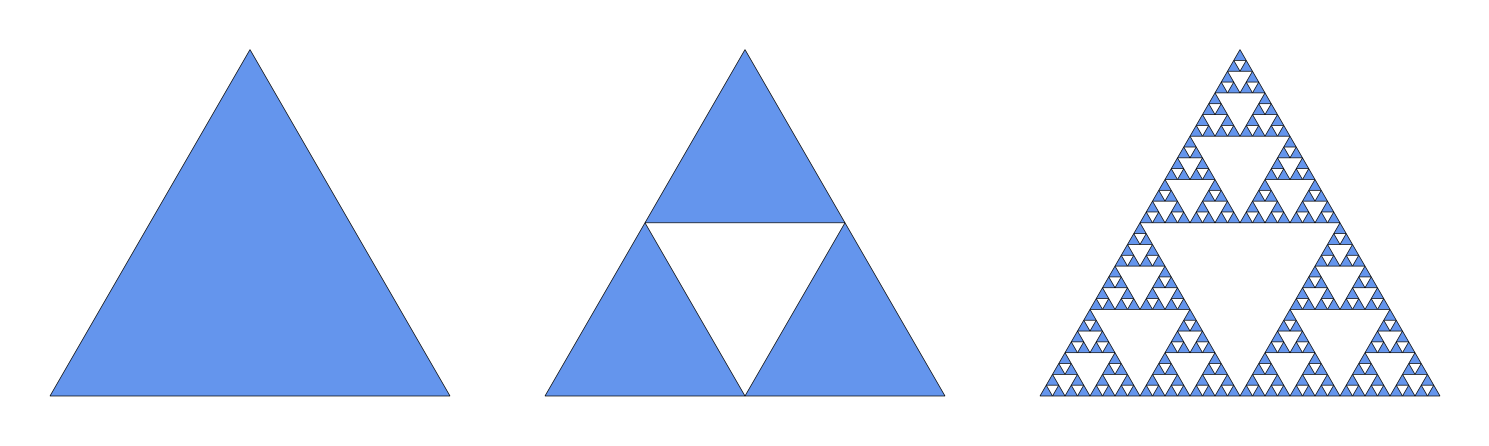

In [5]:
def sierpinski_triangle(level, p1, p2, p3):
    """Generate the triangles for a Sierpinski triangle at the given iteration level."""
    if level == 0:
        return [np.array([p1, p2, p3])]
    
    # Calculate midpoints
    mid1 = (p1 + p2) / 2
    mid2 = (p2 + p3) / 2
    mid3 = (p3 + p1) / 2
    
    # Recursively generate triangles for each sub-triangle
    triangles = []
    triangles.extend(sierpinski_triangle(level-1, p1, mid1, mid3))
    triangles.extend(sierpinski_triangle(level-1, mid1, p2, mid2))
    triangles.extend(sierpinski_triangle(level-1, mid3, mid2, p3))
    
    return triangles

def plot_sierpinski(ax, level):
    """Plot a Sierpinski triangle on the given axes."""
    # Define the initial triangle points
    height = np.sqrt(3) / 2
    p1 = np.array([0, 0])
    p2 = np.array([1, 0])
    p3 = np.array([0.5, height])
    
    if level == 0:
        # For level 0, just plot the single triangle
        triangles = [np.array([p1, p2, p3])]
    else:
        # For level > 0, generate the Sierpinski triangles
        triangles = sierpinski_triangle(level, p1, p2, p3)
    
    # Create and add polygon patches to the axes
    for triangle in triangles:
        # The Polygon constructor takes the vertices as its first argument
        polygon = Polygon(triangle, closed=True, edgecolor='k', facecolor='cornflowerblue', linewidth=0.5)
        ax.add_patch(polygon)
    
    # Set limits and title
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.1, height + 0.1])
    ax.set_aspect('equal')
    ax.set_axis_off()

# Create figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Level 0: Simple triangle
plot_sierpinski(axes[0], 0)

# Level 1: First Sierpinski iteration
plot_sierpinski(axes[1], 1)

# Level 5: Fifth Sierpinski iteration
plot_sierpinski(axes[2], 5)

plt.tight_layout()
plt.savefig('../images/sierpinkski.png', dpi=600, bbox_inches='tight', format='png')
plt.show()

## Exact vs Statistical Fractal

### Fractal tree

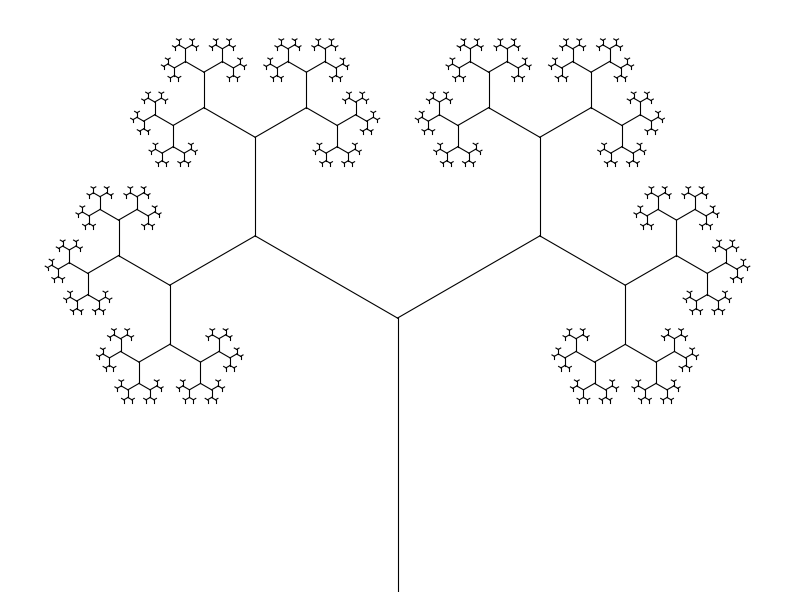

In [6]:
def draw_fractal_tree(ax, x, y, length, angle, depth):
    """
    Draw a self-similar fractal tree.
    
    Parameters:
    - ax: Matplotlib axis
    - x, y: Starting coordinates
    - length: Branch length
    - angle: Angle in radians
    - depth: Recursion depth
    """
    if depth == 0:
        return
    
    # Calculate endpoint using trigonometry
    x2 = x + length * np.sin(angle)
    y2 = y + length * np.cos(angle)
    
    # Draw the branch
    ax.plot([x, x2], [y, y2], 'k-', linewidth=0.8)
    
    # Left branch
    left_angle = angle + np.pi/3
    # Right branch
    right_angle = angle - np.pi/3
    
    # Reduce length for next branches
    new_length = length * 0.6
    
    # Recursively draw the branches
    draw_fractal_tree(ax, x2, y2, new_length, left_angle, depth-1)
    draw_fractal_tree(ax, x2, y2, new_length, right_angle, depth-1)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Configure the axis
#ax.set_xlim(-5, 5)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.axis('off')

# Draw the tree starting from the bottom center
# with initial upward direction (angle = 0)
draw_fractal_tree(ax, 0, 0, 4.7, 0, 10)

# Ensure tight layout
#plt.tight_layout()
plt.savefig('datafiles/fractal_tree.png', dpi=600, bbox_inches='tight', format='png')
plt.show()

## Four properties of fractal signal

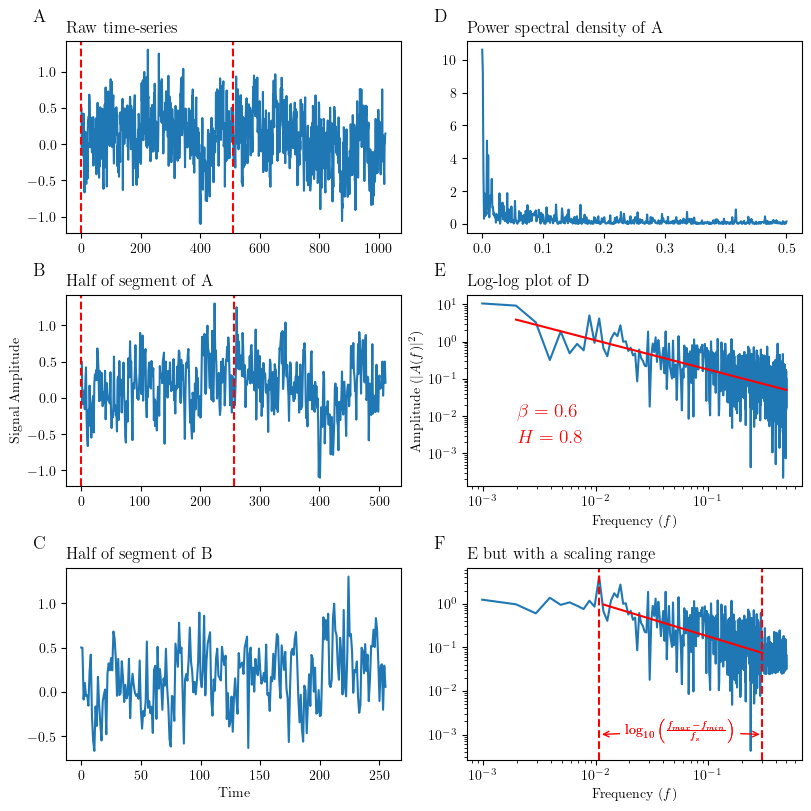

In [7]:
plt.rcParams['text.usetex'] = True #latex

np.random.seed(4)
scale1=1024
scale2=512
scale3=256

fp7 = FBM(scale1, hurst=0.8, length=1, method='daviesharte')
fgnp7 = fp7.fgn()*100

fig, ax = plt.subplots(3,2, constrained_layout=True, figsize=(8,8))
ax[0][0].plot(fgnp7)
ax[0][0].axvline(x=scale2, color='red', linestyle='--')
ax[0][0].axvline(x=0, color='red', linestyle='--')
ax[0][0].set_title("Raw time-series", loc='left')

ax[1][0].plot(fgnp7[:scale2])
ax[1][0].axvline(x=scale3, color='red', linestyle='--')
ax[1][0].axvline(x=0, color='red', linestyle='--')
ax[1][0].set_ylabel('Signal Amplitude')
ax[1][0].set_title("Half of segment of A", loc='left')

ax[2][0].plot(fgnp7[:scale3])
ax[2][0].set_xlabel('Time')
ax[2][0].set_title("Half of segment of B", loc='left')

freq, power = signal.periodogram(fgnp7, 1)
power = power[1:]
freq = freq[1:]

log_power = np.log10(power)
log_freq = np.log10(freq)
log_power = log_power[1:]
log_freq = log_freq[1:]

model = LinearRegression().fit(log_freq.reshape(-1,1), log_power)
predicted_power = 10**model.predict(log_freq.reshape(-1,1))
Hurst = (model.coef_*-1+1)/2

ax[0][1].plot(freq.reshape(-1,1), power)
ax[0][1].set_title("Power spectral density of A", loc='left')

ax[1][1].plot(freq.reshape(-1,1), power)
ax[1][1].set_xscale('log')
ax[1][1].set_yscale('log')
ax[1][1].plot(freq[1:].reshape(-1,1), predicted_power, color='red')
ax[1][1].text(0.002, .01, r"$\beta=0.6$", color="r", fontsize=14)
ax[1][1].text(0.002, .002, r"$H=0.8$", color="r", fontsize=14)
ax[1][1].set_title("Log-log plot of D", loc='left')
ax[1][1].set_xlabel(r"Frequency ($f$)")
ax[1][1].set_ylabel(r"Amplitude ($|A(f)|^{2}$)")

newpower=power
fp5 = FBM(scale1, hurst=0.5, length=1, method='daviesharte')
fgnp5 = fp5.fgn()*5
p5freq, p5power = signal.periodogram(fgnp5, 1)
p5power=p5power - np.mean(p5power) + predicted_power[-1]*1.4
newpower[:10]= (np.random.rand(10)+0.5) # 10 was the power value around the low frequency
newpower[312:]=p5power[312:512]
ax[2][1].plot(freq.reshape(-1,1), newpower)
ax[2][1].plot(freq[1:].reshape(-1,1)[10:312], predicted_power[10:312], color='red')
ax[2][1].axvline(x=freq[10], color='red', linestyle='--')
ax[2][1].axvline(x=freq[312], color='red', linestyle='--')
ax[2][1].set_xscale('log')
ax[2][1].set_yscale('log')
ax[2][1].set_xlabel(r"Frequency ($f$)")
ax[2][1].set_title("E but with a scaling range", loc='left')

text = r"$\log_{10} \left( \frac{f_{max} - f_{min}}{f_s} \right)$"
text_xy = (freq[10]*1.7, 0.001)
ax[2][1].annotate(text, (freq[10],0.001), text_xy, arrowprops={"arrowstyle": "->", "color": "red"}, color="red")
ax[2][1].annotate(text, (freq[312],0.001), text_xy, arrowprops={"arrowstyle": "->", "color": "red"}, color="red")

for i in range(3):
    ax[i, 0].text(-0.1, 1.1, string.ascii_uppercase[i], transform=ax[i, 0].transAxes, 
                  size=13, weight='bold')
    ax[i, 1].text(-0.1, 1.1, string.ascii_uppercase[i+3], transform=ax[i, 1].transAxes, 
                  size=13, weight='bold')

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

plt.savefig('../images/fourproperties.png', dpi=600, bbox_inches='tight', format='png')
plt.show()

## Typical Sample Paths

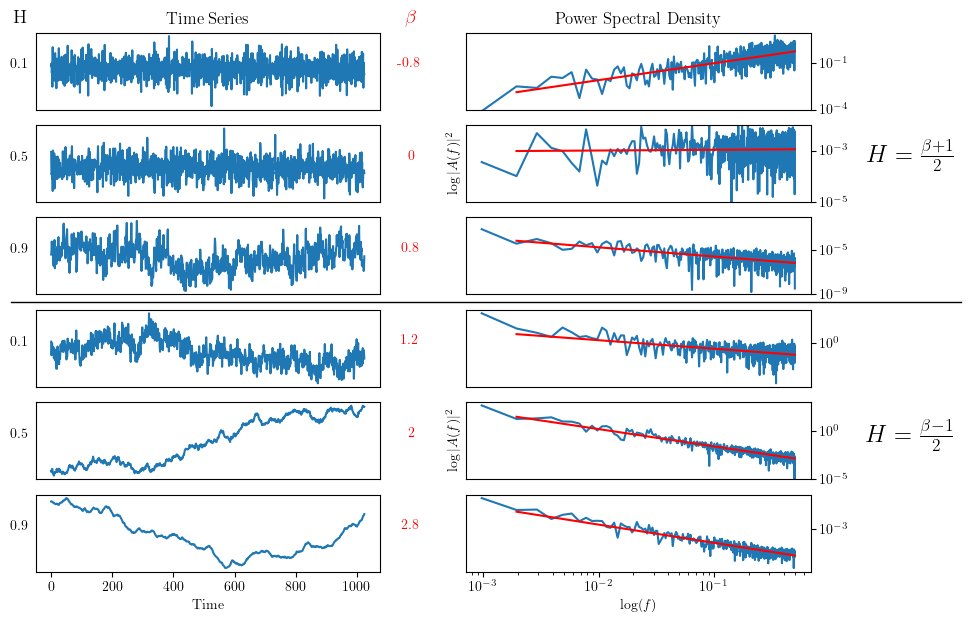

In [8]:
np.random.seed(1)
plt.rcParams['text.usetex'] = True #latex

def psd(timeseries):
    freq, power = signal.periodogram(timeseries, 1)
    power = power[1:]
    freq = freq[1:]

    log_power = np.log10(power)
    log_freq = np.log10(freq)
    log_power = log_power[1:]
    log_freq = log_freq[1:]

    model = LinearRegression()
    model.fit(log_freq.reshape(-1,1), log_power)
    predicted_power = 10**model.predict(log_freq.reshape(-1,1))

    return freq.reshape(-1,1), power, predicted_power

fp5 = FBM(1024, hurst=0.5, length=1, method='daviesharte')
fp1 = FBM(1024, hurst=0.1, length=1, method='daviesharte')
fp9 = FBM(1024, hurst=0.9, length=1, method='daviesharte')
fgnp5 = fp5.fgn()
fgnp1 = fp1.fgn()
fgnp9 = fp9.fgn()
fbmp5 = fp5.fbm()
fbmp1 = fp1.fbm()
fbmp9 = fp9.fbm()

fig, ax = plt.subplots(6,2, figsize=(10,7))
fig.subplots_adjust(wspace=0.25)
ax[0,0].plot(fgnp1)
ax[0,0].set_title("Time Series")
ax[0,0].xaxis.set_visible(False)
ax[0,0].set_ylabel("0.1", rotation=0, labelpad=12)
ax[0,0].text(1.05, 0.55, "-0.8", rotation=0,
             transform=ax[0,0].transAxes, color='red')
ax[0,0].set_yticks([])
ax[1,0].plot(fgnp5)
ax[1,0].xaxis.set_visible(False)
ax[1,0].set_yticks([])
ax[1,0].set_ylabel("0.5", rotation=0, labelpad=12)
ax[1,0].text(1.08, 0.55, "0", rotation=0,
             transform=ax[1,0].transAxes, color='red')
ax[2,0].plot(fgnp9)
ax[2,0].xaxis.set_visible(False)
ax[2,0].set_yticks([])
ax[2,0].set_ylabel("0.9", rotation=0, labelpad=12)
ax[2,0].text(1.06, 0.55, "0.8", rotation=0,
             transform=ax[2,0].transAxes, color='red')
ax[3,0].plot(fbmp1)
ax[3,0].xaxis.set_visible(False)
ax[3,0].set_yticks([])
ax[3,0].set_ylabel("0.1", rotation=0, labelpad=12)
ax[3,0].text(1.06, 0.55, "1.2", rotation=0,
             transform=ax[3,0].transAxes, color='red')
ax[4,0].plot(fbmp5)
ax[4,0].xaxis.set_visible(False)
ax[4,0].set_yticks([])
ax[4,0].set_ylabel("0.5", rotation=0, labelpad=12)
ax[4,0].text(1.08, 0.55, "2", rotation=0,
             transform=ax[4,0].transAxes, color='red')
ax[5,0].plot(fbmp9)
ax[5,0].set_yticks([])
ax[5,0].set_ylabel("0.9", rotation=0, labelpad=12)
ax[5,0].set_xlabel("Time")
ax[5,0].text(1.06, 0.55, "2.8", rotation=0,
             transform=ax[5,0].transAxes, color='red')

line = lines.Line2D([0.1, 1.05], [0.495, 0.495], transform=fig.transFigure, color='black', linewidth=1)
fig.add_artist(line)
fig.text(1, 0.705, r"$H=\frac{\beta+1}{2}$", ha='center', va='center', fontsize=18, transform=fig.transFigure)
fig.text(1, 0.305, r"$H=\frac{\beta-1}{2}$", ha='center', va='center', fontsize=18, transform=fig.transFigure)

fig.text(0.11, .9, r"H", fontsize=14, ha='center', va='center', transform=fig.transFigure)
fig.text(0.5, .9, r"$\beta$", fontsize=14, ha='center', va='center', transform=fig.transFigure, color='red')

freq,power,pred_power = psd(fgnp1)
ax[0,1].plot(freq,power)
ax[0,1].set_title("Power Spectral Density")
ax[0,1].plot(freq[1:], pred_power, color='red')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].xaxis.set_visible(False)
ax[0,1].yaxis.tick_right()
ax[0,1].set_ylim(1e-4,10)

freq,power,pred_power = psd(fgnp5)
ax[1,1].plot(freq,power)
ax[1,1].plot(freq[1:], pred_power, color='red')
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].xaxis.set_visible(False)
ax[1,1].yaxis.tick_right()
ax[1,1].set_ylabel(r"$\log|A(f)|^2$")
ax[1,1].set_ylim(1e-5,1e-2)

freq,power,pred_power = psd(fgnp9)
ax[2,1].plot(freq,power)
ax[2,1].plot(freq[1:], pred_power, color='red')
ax[2,1].set_xscale('log')
ax[2,1].set_yscale('log')
ax[2,1].xaxis.set_visible(False)
ax[2,1].yaxis.tick_right()
ax[2,1].set_ylim(1e-9,1e-2)

freq,power,pred_power = psd(fbmp1)
ax[3,1].plot(freq,power)
ax[3,1].plot(freq[1:], pred_power, color='red')
ax[3,1].set_xscale('log')
ax[3,1].set_yscale('log')
ax[3,1].xaxis.set_visible(False)
ax[3,1].yaxis.tick_right()

freq,power,pred_power = psd(fbmp5)
ax[4,1].plot(freq,power)
ax[4,1].plot(freq[1:], pred_power, color='red')
ax[4,1].set_xscale('log')
ax[4,1].set_yscale('log')
ax[4,1].xaxis.set_visible(False)
ax[4,1].set_ylabel(r"$\log|A(f)|^2$")
ax[4,1].yaxis.tick_right()
ax[4,1].set_ylim(1e-5,1e3)

freq,power,pred_power = psd(fbmp9)
ax[5,1].plot(freq,power)
ax[5,1].plot(freq[1:], pred_power, color='red')
ax[5,1].set_xscale('log')
ax[5,1].set_yscale('log')
#ax[5,1].set_xticklabels([])
ax[5,1].yaxis.tick_right()
ax[5,1].set_xlabel(r"$\log(f)$")

plt.savefig('../images/typicalsamplepaths.png', dpi=600, bbox_inches='tight', format='png')
plt.show()